In [5]:
import json
import loading
import re
import numpy as np
import seaborn as sc
import matplotlib.pyplot as plt
from umap import UMAP

In [6]:
with open("../articles.json", 'r', encoding='UTF-8') as articles_json:
    article_list = json.load(articles_json)

In [7]:
def get_all_comments(article_list, language):
    comments = []
    rubric = []
    for article in article_list:
        if language in article['content']:
            for comment in article['content'][language]['comments']:
                comments.append({'text': comment,
                                 'category': article['category'][0]})
    return comments

def get_all_articles(article_list, language):
    articles = []
    rubric = []
    for article in article_list:
        if language in article['content']:
            text = " ".join(article['content'][language]['text'])
            articles.append({'text': text,
                             'category': article['category'][0]})
    return articles

def get_all_words(text_list):
    words = set()
    for text in text_list:
        text = re.sub(r"[\.,!?\"\'\-/\(\)´`“”\@\*]", " ", text)
        words.update(set(text.split()))
    return words

def get_access_fn(matrix, mapping):
    return lambda word: matrix[mapping[word.lower()], :] \
                        if word.lower() in mapping  \
                        else np.zeros(matrix.shape[1])

def get_text_embeddings(text_list, access_fn):
    vectors = []
    for text in text_list:
        words = text['text'].split()
        vectors.append(np.mean(np.array([access_fn(x) for x in words]), axis=0))
    return np.array(vectors)

def load_word_vectors(article_list, loading_fn, language, embedding):

    entries = loading_fn(article_list, language)
    entries = [x for x in entries if x['text'] != ''
                  and x['category'] in ('Culture', 'Sport', 'Politics', 'Weather')]

    words = get_all_words([x['text'] for x in entries])

    matrix, mapping = \
    loading.load_word_vectors(path_to_embedding=embedding, \
                              vocabulary=words)
    
    get_vector = get_access_fn(matrix, mapping)
    article_vectors = get_text_embeddings(entries, get_vector)
    
    return entries, article_vectors

In [8]:
en_comments, en_comment_matrix = \
load_word_vectors(article_list, get_all_comments, "English", "../Embeddings/en_aligned.vec")

2519370it [02:08, 19647.88it/s]


In [9]:
transformation = UMAP(n_components=2, n_neighbors=5)
en_2d = transformation.fit_transform(np.array(en_comment_matrix))

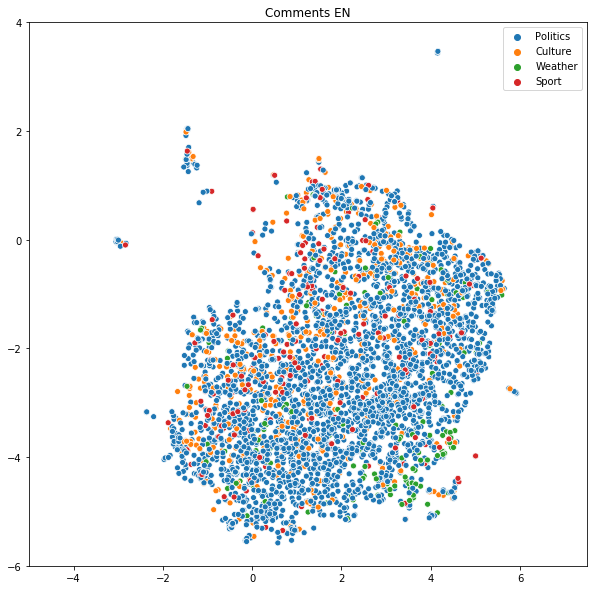

In [22]:
plt.figure(figsize=(10,10))
sc.scatterplot(en_2d[:, 0], en_2d[:, 1], hue=[x['category'] for x in en_comments]).set_title("Comments EN")

plt.xlim(-5,7.5)
plt.ylim(-6,4)

plt.savefig("EN_comments.png")

In [11]:
en_articles, en_article_matrix = \
load_word_vectors(article_list, get_all_articles, "English", "../Embeddings/en_aligned.vec")

2519370it [02:04, 20252.24it/s]


In [12]:
transformation = UMAP(n_components=2, n_neighbors=50)
en_2d_articles = transformation.fit_transform(en_article_matrix)

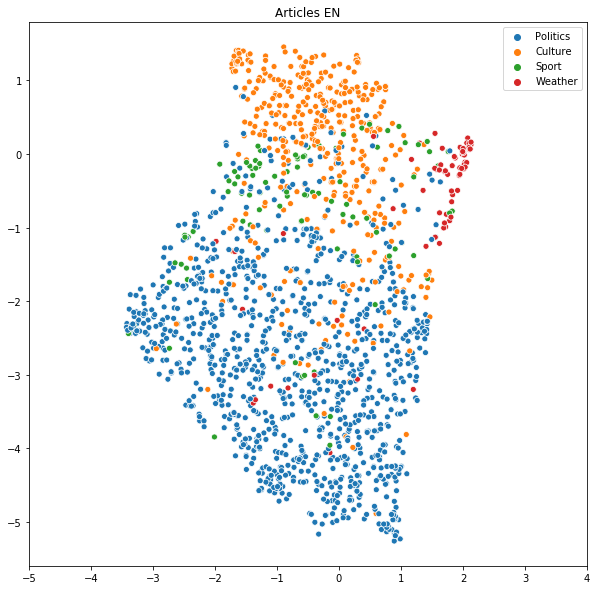

In [13]:
plt.figure(figsize=(10,10))
sc.scatterplot(en_2d_articles[:, 0], \
               en_2d_articles[:, 1], \
               hue=[x['category'] for x in en_articles]).set_title("Articles EN")
plt.xlim(-5,4)
#plt.ylim(2,10)
plt.savefig("EN_articles.png")

In [14]:
de_comments, de_comment_matrix = \
load_word_vectors(article_list, get_all_comments, "German", "../Embeddings/de_aligned.vec")

2275233it [01:52, 20194.61it/s]


In [15]:
transformation = UMAP(n_components=2, n_neighbors=50)
de_2d_comment = transformation.fit_transform(de_comment_matrix)

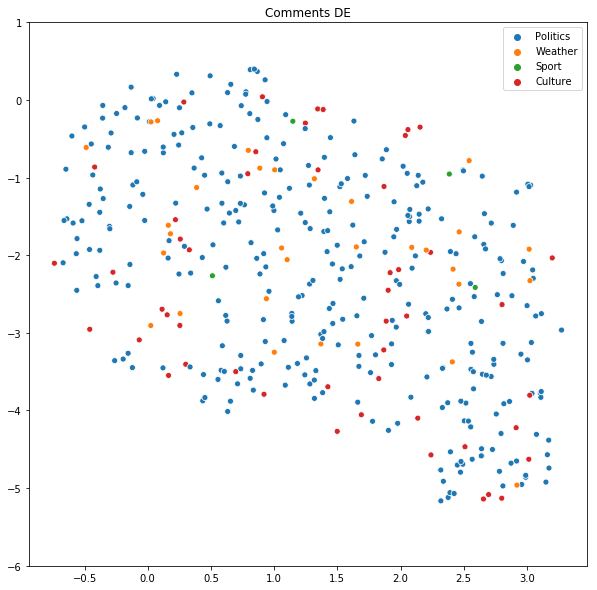

In [23]:
plt.figure(figsize=(10,10))
sc.scatterplot(de_2d_comment[:, 0], \
               de_2d_comment[:, 1], \
               hue=[x['category'] for x in de_comments]).set_title("Comments DE")
#plt.xlim(-5,4)
plt.ylim(-6,1)
plt.savefig("DE_comments.png")

In [17]:
de_articles, de_article_matrix = \
load_word_vectors(article_list, get_all_articles, "German", "../Embeddings/de_aligned.vec")

2275233it [01:53, 20041.87it/s]


In [18]:
transformation = UMAP(n_components=2, n_neighbors=50)
de_2d_article = transformation.fit_transform(de_article_matrix)

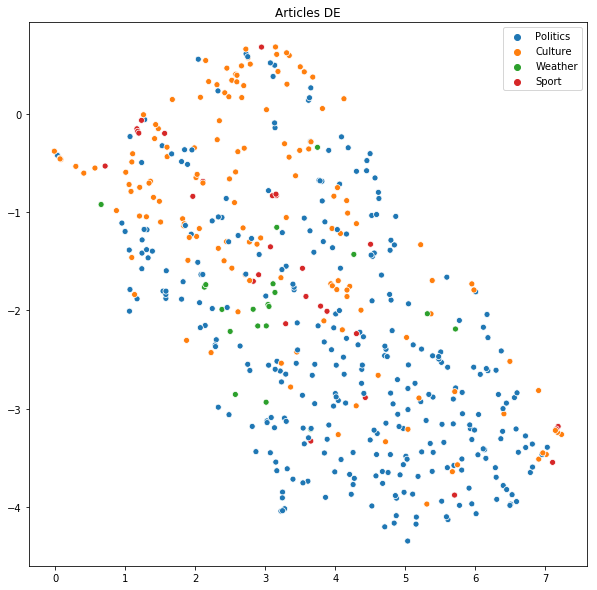

In [19]:
plt.figure(figsize=(10,10))
sc.scatterplot(de_2d_article[:, 0], \
               de_2d_article[:, 1], \
               hue=[x['category'] for x in de_articles]).set_title("Articles DE")
#plt.xlim(-5,4)
#plt.ylim(2,10)
plt.savefig("DE_articles.png")

In [20]:
de_article_matrix

array([[ 0.01340678,  0.01495   ,  0.02721013, ..., -0.02992324,
        -0.01537866,  0.00735868],
       [ 0.01772774,  0.0180281 ,  0.02389197, ..., -0.03196204,
        -0.00563869,  0.00290584],
       [ 0.01138231,  0.01923345,  0.03006336, ..., -0.03283105,
        -0.01079269,  0.00962489],
       ...,
       [ 0.02030769,  0.02026044,  0.02913846, ..., -0.02711593,
        -0.00449341,  0.00979176],
       [ 0.01109427,  0.02124029,  0.02740382, ..., -0.02963742,
        -0.00884777,  0.00634459],
       [ 0.01285369,  0.01509566,  0.03042245, ..., -0.02965889,
        -0.00945325,  0.00317354]])